# Notebook to plot reads mapped to the phage contigs

In [77]:
#Import libraries
import matplotlib.pyplot as plt
import numpy as np
import csv
import re
import os
from os.path import exists
import seaborn as sns
import pandas as pd

In [86]:
#ANI output 
ani=pd.read_csv("/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/fastANI-recircular-rc.out", sep="\t")
#picking rows with values more than 97% 
ani.columns.values[0]="query"
ani.columns.values[1]="reference"
ani.columns.values[2]="ani"
ani.columns.values[3]="orthologs-matches"
ani.columns.values[4]="query-fragments"
#picking only rows that have 99% ANI 
ani_subset=(ani["ani"]>99.00) & (ani["ani"]<100.00)
ani[ani_subset]

,query,reference,ani,orthologs-matches,query-fragments
0,recircular-rc/Bc01.fasta,recircular-rc/Bc04.fasta,99.8826,33,33
13,recircular-rc/Bc02.fasta,recircular-rc/Bc03.fasta,99.3704,32,32
26,recircular-rc/Bc03.fasta,recircular-rc/Bc02.fasta,99.5263,32,33
39,recircular-rc/Bc04.fasta,recircular-rc/Bc01.fasta,99.8749,33,33
51,recircular-rc/Bc05.fasta,recircular-rc/Bc08.fasta,99.9152,31,32
52,recircular-rc/Bc05.fasta,recircular-rc/Bc07.fasta,99.8816,32,32
77,recircular-rc/Bc07.fasta,recircular-rc/Bc08.fasta,99.9688,31,32
78,recircular-rc/Bc07.fasta,recircular-rc/Bc05.fasta,99.8954,32,32
90,recircular-rc/Bc08.fasta,recircular-rc/Bc07.fasta,99.9620,30,32
91,recircular-rc/Bc08.fasta,recircular-rc/Bc05.fasta,99.9135,32,32


In [83]:
subset = ani['query'].str.contains('Bc16', case=False, na=False)
ani[subset]

,query,reference,ani,orthologs-matches,query-fragments
158,Bc-final-genomes/Bc16.fasta,Bc-final-genomes/Bc16.fasta,100.0000,32,32
159,Bc-final-genomes/Bc16.fasta,Bc-final-genomes/Bc01.fasta,97.8950,30,32
160,Bc-final-genomes/Bc16.fasta,Bc-final-genomes/Bc04.fasta,97.8950,30,32
161,Bc-final-genomes/Bc16.fasta,Bc-final-genomes/Bc05.fasta,86.9736,8,32
162,Bc-final-genomes/Bc16.fasta,Bc-final-genomes/Bc07.fasta,86.9736,8,32
163,Bc-final-genomes/Bc16.fasta,Bc-final-genomes/Bc08.fasta,86.9736,8,32
164,Bc-final-genomes/Bc16.fasta,Bc-final-genomes/Bc06.fasta,85.8505,10,32
165,Bc-final-genomes/Bc16.fasta,Bc-final-genomes/Bc09.fasta,85.2937,8,32
166,Bc-final-genomes/Bc16.fasta,Bc-final-genomes/Bc13.fasta,85.2937,8,32
167,Bc-final-genomes/Bc16.fasta,Bc-final-genomes/Bc02.fasta,85.0730,7,32


In [42]:
#reading through the bedtools genomecov results 
filepath="/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage"
sample_names=["Bc01", "Bc02", "Bc03", "Bc04", "Bc05", "Bc06", "Bc07", "Bc08", "Bc09", "Bc10", "Bc11", "Bc12", "Bc13", "Bc14", "Bc15", "Bc16"]
new=pd.DataFrame()
for f in sample_names:
    filename=filepath+"/"+f+"-illuminaReads-bam/"+f+"-Ill-bedtools-genomecov.tsv"
    print (filename)
    if (os.path.exists(filename)==True):
        readcovIl=pd.read_csv(filename, sep="\t")
        #print(readcovIl)
        readcovIl.columns.values[0] = "Sample"
        readcovIl.columns.values[1] = "Genome position"
        readcovIl.columns.values[2] = "Depth"
        #print (readcovIl)
        readcovIl["mean"]= readcovIl["Depth"].rolling(100, center=False).mean()
        new = new.append(readcovIl)
new

/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc01-illuminaReads-bam/Bc01-Ill-bedtools-genomecov.tsv
/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc02-illuminaReads-bam/Bc02-Ill-bedtools-genomecov.tsv
/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc03-illuminaReads-bam/Bc03-Ill-bedtools-genomecov.tsv
/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc04-illuminaReads-bam/Bc04-Ill-bedtools-genomecov.tsv
/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc05-illuminaReads-bam/Bc05-Ill-bedtools-genomecov.tsv
/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc06-illuminaReads-bam/Bc06-Ill-bedtools-genomecov.tsv
/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc07-illuminaReads-bam/Bc07-Ill-bedtools-genomecov.tsv


/local/nala0006/1106987/ipykernel_3918118/4004454059.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new = new.append(readcovIl)
/local/nala0006/1106987/ipykernel_3918118/4004454059.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new = new.append(readcovIl)
/local/nala0006/1106987/ipykernel_3918118/4004454059.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new = new.append(readcovIl)
/local/nala0006/1106987/ipykernel_3918118/4004454059.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new = new.append(readcovIl)
/local/nala0006/1106987/ipykernel_3918118/4004454059.py:16: FutureWarning: The frame.append method is deprec

/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc08-illuminaReads-bam/Bc08-Ill-bedtools-genomecov.tsv
/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc09-illuminaReads-bam/Bc09-Ill-bedtools-genomecov.tsv
/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc10-illuminaReads-bam/Bc10-Ill-bedtools-genomecov.tsv
/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc11-illuminaReads-bam/Bc11-Ill-bedtools-genomecov.tsv
/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc12-illuminaReads-bam/Bc12-Ill-bedtools-genomecov.tsv
/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc13-illuminaReads-bam/Bc13-Ill-bedtools-genomecov.tsv
/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc14-illuminaReads-bam/Bc14-Ill-bedtools-genomecov.tsv
/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc15-illuminaReads-bam/Bc15-Ill-bedtools-genomecov.tsv
/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc

/local/nala0006/1106987/ipykernel_3918118/4004454059.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new = new.append(readcovIl)
/local/nala0006/1106987/ipykernel_3918118/4004454059.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new = new.append(readcovIl)
/local/nala0006/1106987/ipykernel_3918118/4004454059.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new = new.append(readcovIl)
/local/nala0006/1106987/ipykernel_3918118/4004454059.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new = new.append(readcovIl)
/local/nala0006/1106987/ipykernel_3918118/4004454059.py:16: FutureWarning: The frame.append method is deprec

,Sample,Genome position,Depth,mean
0,Bc01~contig_1_rc,2,3114,NaN
1,Bc01~contig_1_rc,3,3142,NaN
2,Bc01~contig_1_rc,4,3221,NaN
3,Bc01~contig_1_rc,5,3251,NaN
4,Bc01~contig_1_rc,6,3270,NaN
...,...,...,...,...
98797,Bc16~k141_4400_rc,98799,651,881.14
98798,Bc16~k141_4400_rc,98800,626,877.78
98799,Bc16~k141_4400_rc,98801,616,874.31
98800,Bc16~k141_4400_rc,98802,607,870.99


/home/nala0006/miniconda3/envs/notebook_env/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


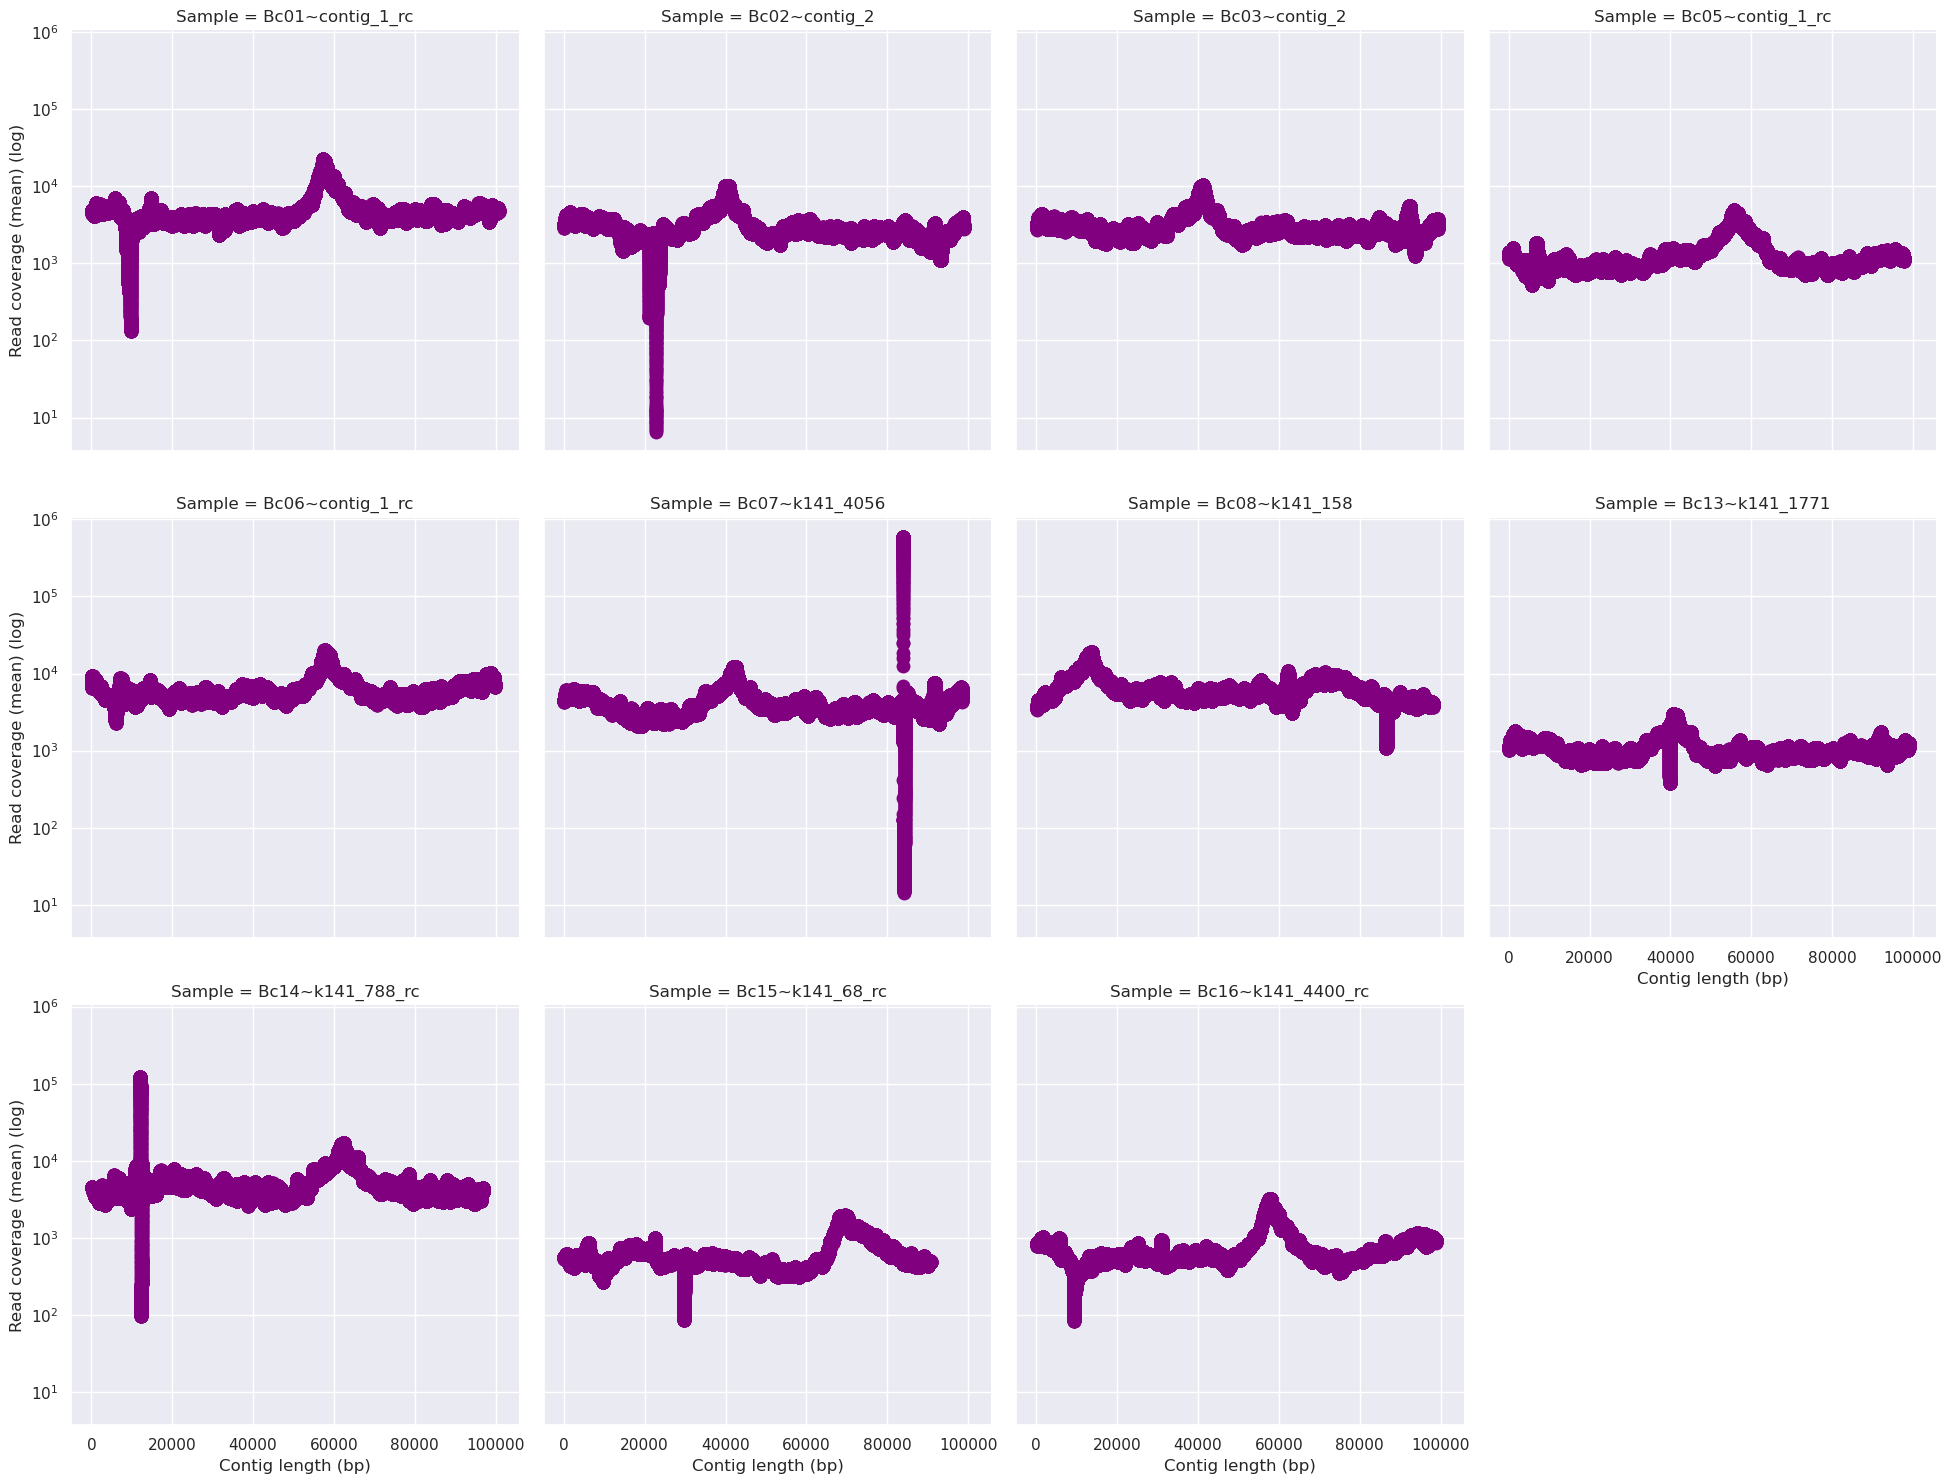

In [44]:
#plotting reads mapped across the genome position 
#sns.histplot(result, x="Coverage", kde=True, bins=10)
sns.set_theme(font_scale=1)
ax= sns.relplot("Genome position", "mean", data=new, col="Sample", col_wrap=4, 
                s=100, alpha=1, linewidth=0.0, color="purple")

ax.set_axis_labels("Contig length (bp)")
ax.set_ylabels("Read coverage (mean) (log)")
ax.set(yscale="log")


/home/nala0006/miniconda3/envs/notebook_env/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


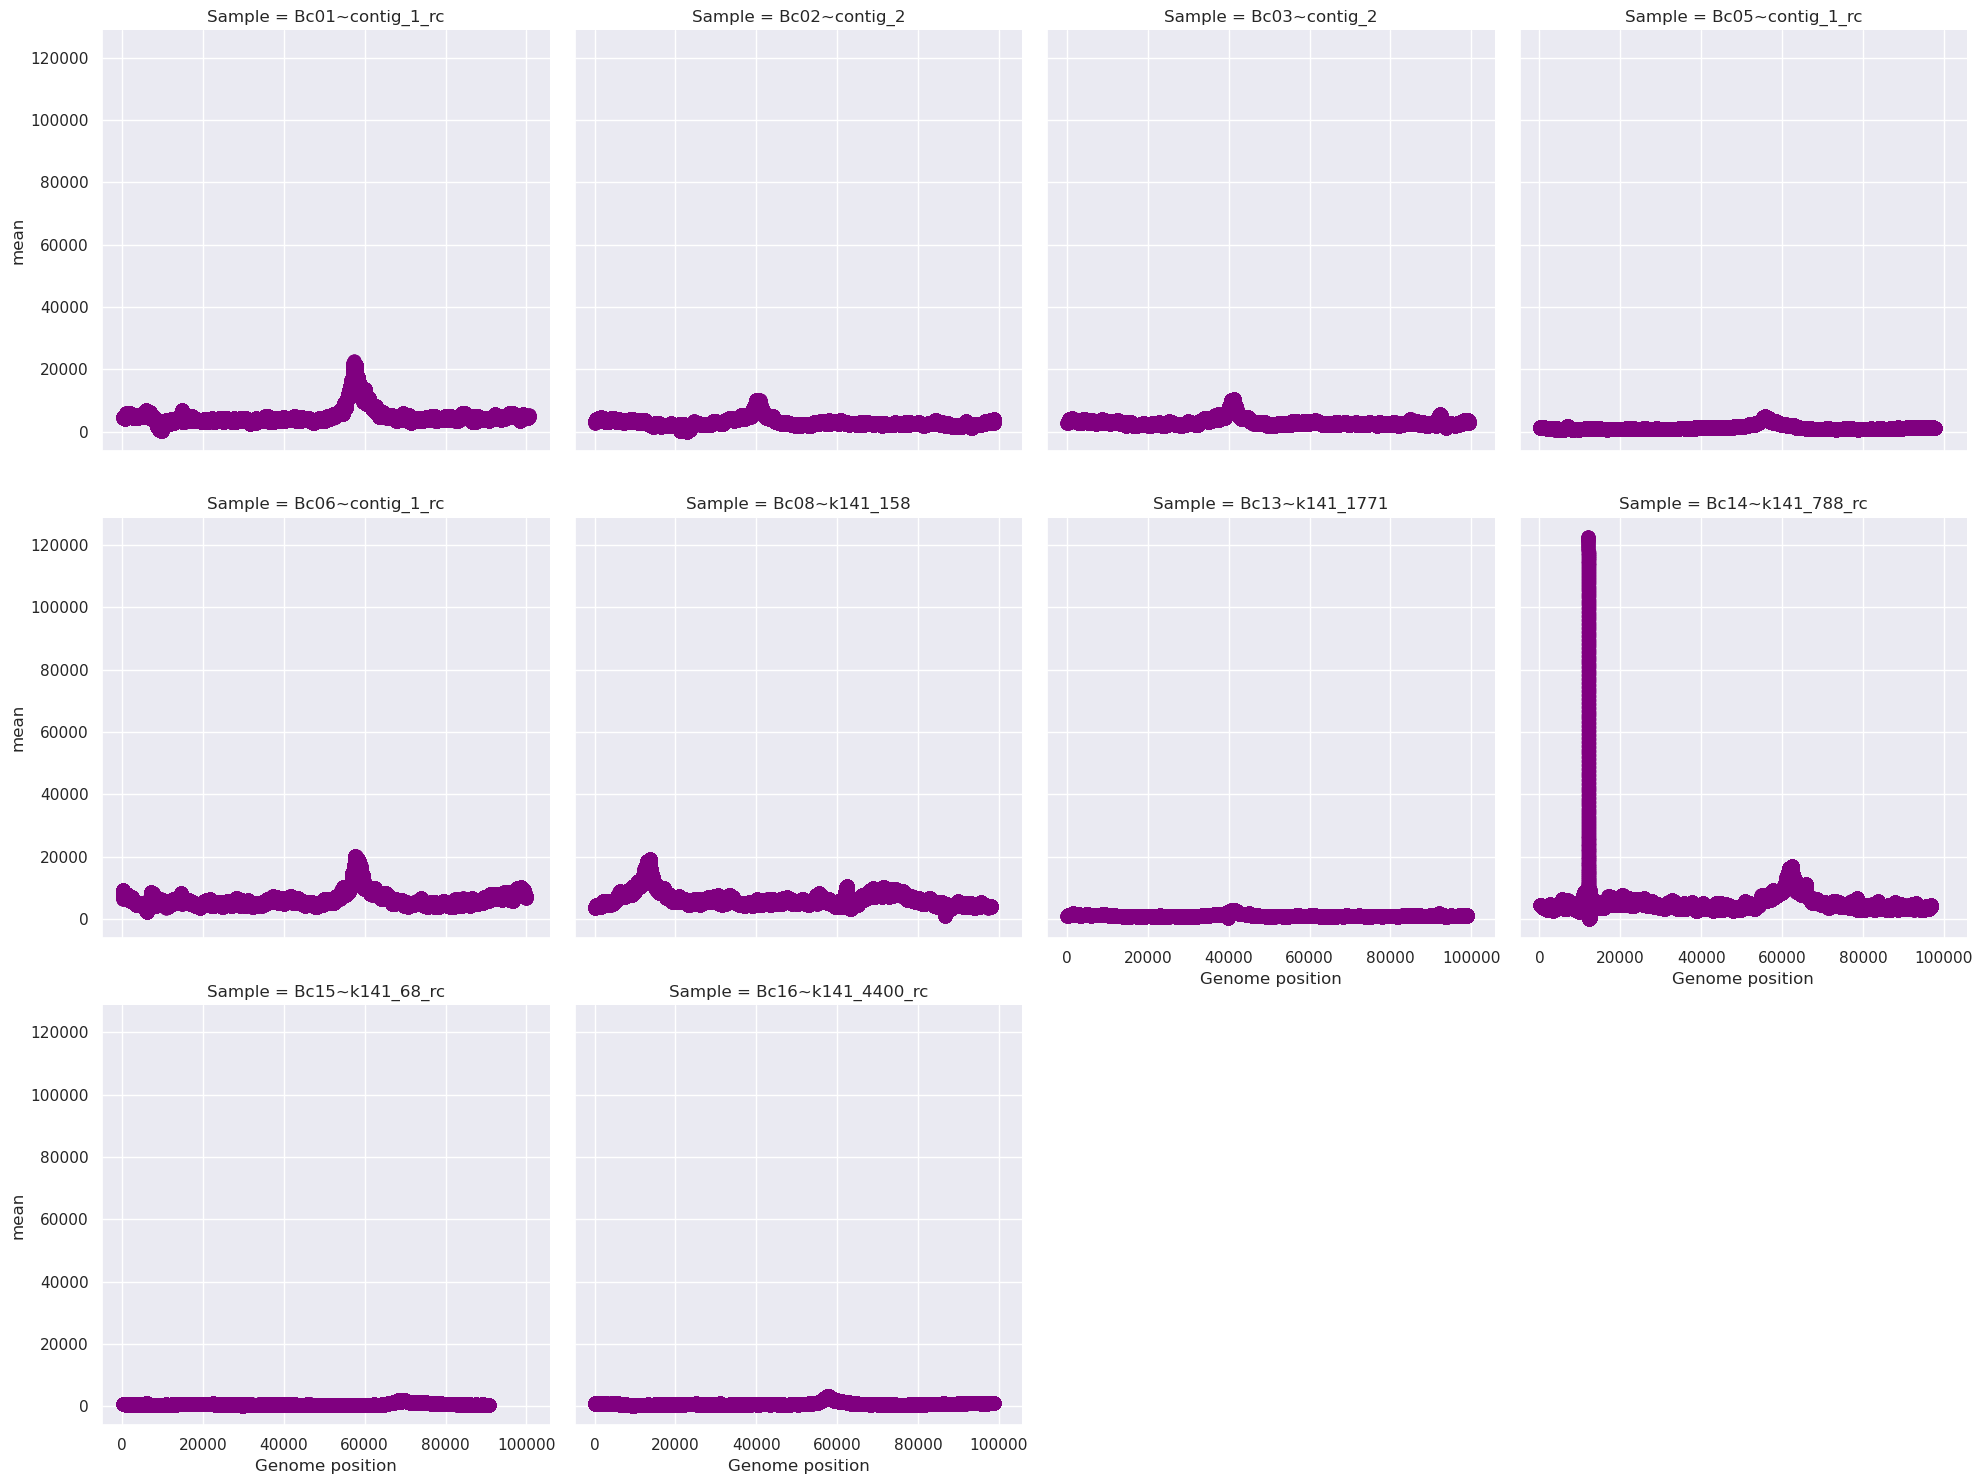

In [45]:
#plotting without Bc_07 
readcov_wBc07 = ~new['Sample'].str.contains('07', case=False, na=False)
ax= sns.relplot("Genome position", "mean", data=new[readcov_wBc07], col="Sample", col_wrap=4, 
                s=100, alpha=1, linewidth=0.0, color="purple")

/home/nala0006/miniconda3/envs/notebook_env/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


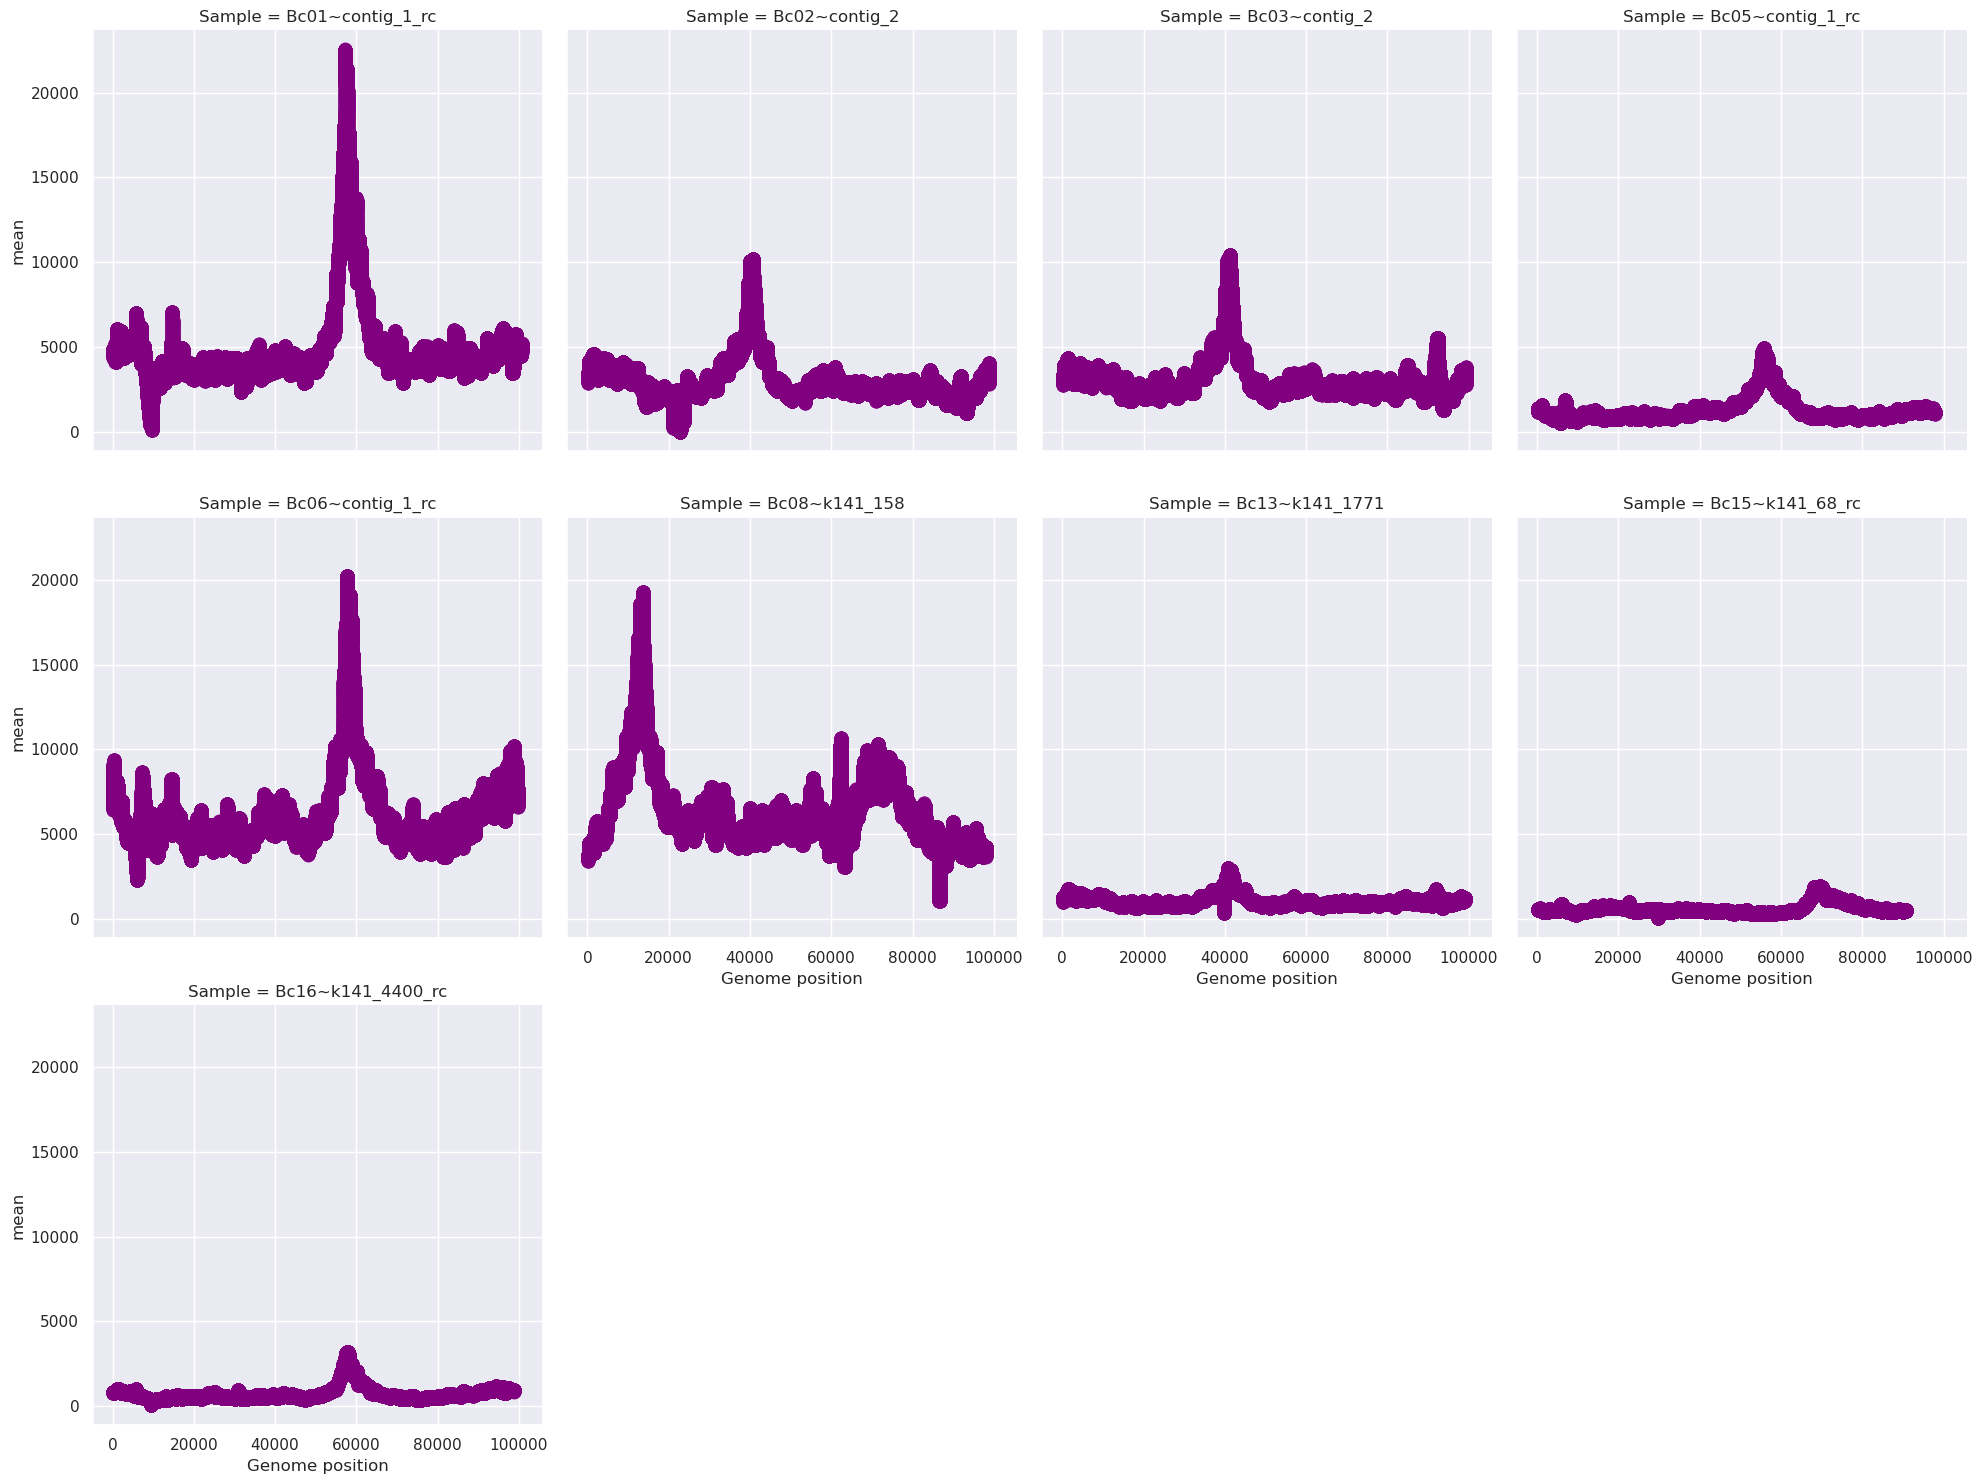

In [46]:
#plotting without Bc_07 and bc14
readcov_wBc07 = ~new['Sample'].str.contains('07', case=False, na=False)
new_wBc07=new[readcov_wBc07]
readcov_wBc0714 = ~new_wBc07['Sample'].str.contains('Bc14', case=False, na=False)
ax= sns.relplot("Genome position", "mean", data=new_wBc07[readcov_wBc0714], col="Sample", col_wrap=4, 
                s=100, alpha=1, linewidth=0.0, color="purple")

In [47]:
#reading through the bedtools genomecov results 
filepath="/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage"
sample_names=["Bc01", "Bc02", "Bc03", "Bc04", "Bc05", "Bc06", "Bc07", "Bc08", "Bc09", "Bc10", "Bc11", "Bc12", "Bc13", "Bc14", "Bc15", "Bc16"]
new=pd.DataFrame()
for f in sample_names:
    filename=filepath+"/"+f+"-NanoReads-bam/"+f+"-Nano-bedtools-genomecov.tsv"
    print (filename)
    if (os.path.exists(filename)==True):
        readcovIl=pd.read_csv(filename, sep="\t")
        #print(readcovIl)
        readcovIl.columns.values[0] = "Sample"
        readcovIl.columns.values[1] = "Genome position"
        readcovIl.columns.values[2] = "Depth"
        readcovIl["mean"]= readcovIl["Depth"].rolling(100, center=False).mean()
        #print (readcovIl)
        new = new.append(readcovIl)
new

/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc01-NanoReads-bam/Bc01-Nano-bedtools-genomecov.tsv
/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc02-NanoReads-bam/Bc02-Nano-bedtools-genomecov.tsv
/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc03-NanoReads-bam/Bc03-Nano-bedtools-genomecov.tsv
/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc04-NanoReads-bam/Bc04-Nano-bedtools-genomecov.tsv
/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc05-NanoReads-bam/Bc05-Nano-bedtools-genomecov.tsv
/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc06-NanoReads-bam/Bc06-Nano-bedtools-genomecov.tsv
/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc07-NanoReads-bam/Bc07-Nano-bedtools-genomecov.tsv
/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc08-NanoReads-bam/Bc08-Nano-bedtools-genomecov.tsv


/local/nala0006/1106987/ipykernel_3918118/362867557.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new = new.append(readcovIl)
/local/nala0006/1106987/ipykernel_3918118/362867557.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new = new.append(readcovIl)
/local/nala0006/1106987/ipykernel_3918118/362867557.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new = new.append(readcovIl)
/local/nala0006/1106987/ipykernel_3918118/362867557.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new = new.append(readcovIl)
/local/nala0006/1106987/ipykernel_3918118/362867557.py:16: FutureWarning: The frame.append method is deprecated 

/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc09-NanoReads-bam/Bc09-Nano-bedtools-genomecov.tsv
/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc10-NanoReads-bam/Bc10-Nano-bedtools-genomecov.tsv
/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc11-NanoReads-bam/Bc11-Nano-bedtools-genomecov.tsv
/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc12-NanoReads-bam/Bc12-Nano-bedtools-genomecov.tsv
/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc13-NanoReads-bam/Bc13-Nano-bedtools-genomecov.tsv
/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc14-NanoReads-bam/Bc14-Nano-bedtools-genomecov.tsv
/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc15-NanoReads-bam/Bc15-Nano-bedtools-genomecov.tsv
/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc16-NanoReads-bam/Bc16-Nano-bedtools-genomecov.tsv


/local/nala0006/1106987/ipykernel_3918118/362867557.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new = new.append(readcovIl)
/local/nala0006/1106987/ipykernel_3918118/362867557.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new = new.append(readcovIl)
/local/nala0006/1106987/ipykernel_3918118/362867557.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new = new.append(readcovIl)


,Sample,Genome position,Depth,mean
0,Bc01~contig_1_rc,2,47,NaN
1,Bc01~contig_1_rc,3,48,NaN
2,Bc01~contig_1_rc,4,50,NaN
3,Bc01~contig_1_rc,5,54,NaN
4,Bc01~contig_1_rc,6,55,NaN
...,...,...,...,...
90452,Bc11~contig_1_rc,90454,10,15.42
90453,Bc11~contig_1_rc,90455,10,15.35
90454,Bc11~contig_1_rc,90456,10,15.28
90455,Bc11~contig_1_rc,90457,8,15.19


/home/nala0006/miniconda3/envs/notebook_env/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


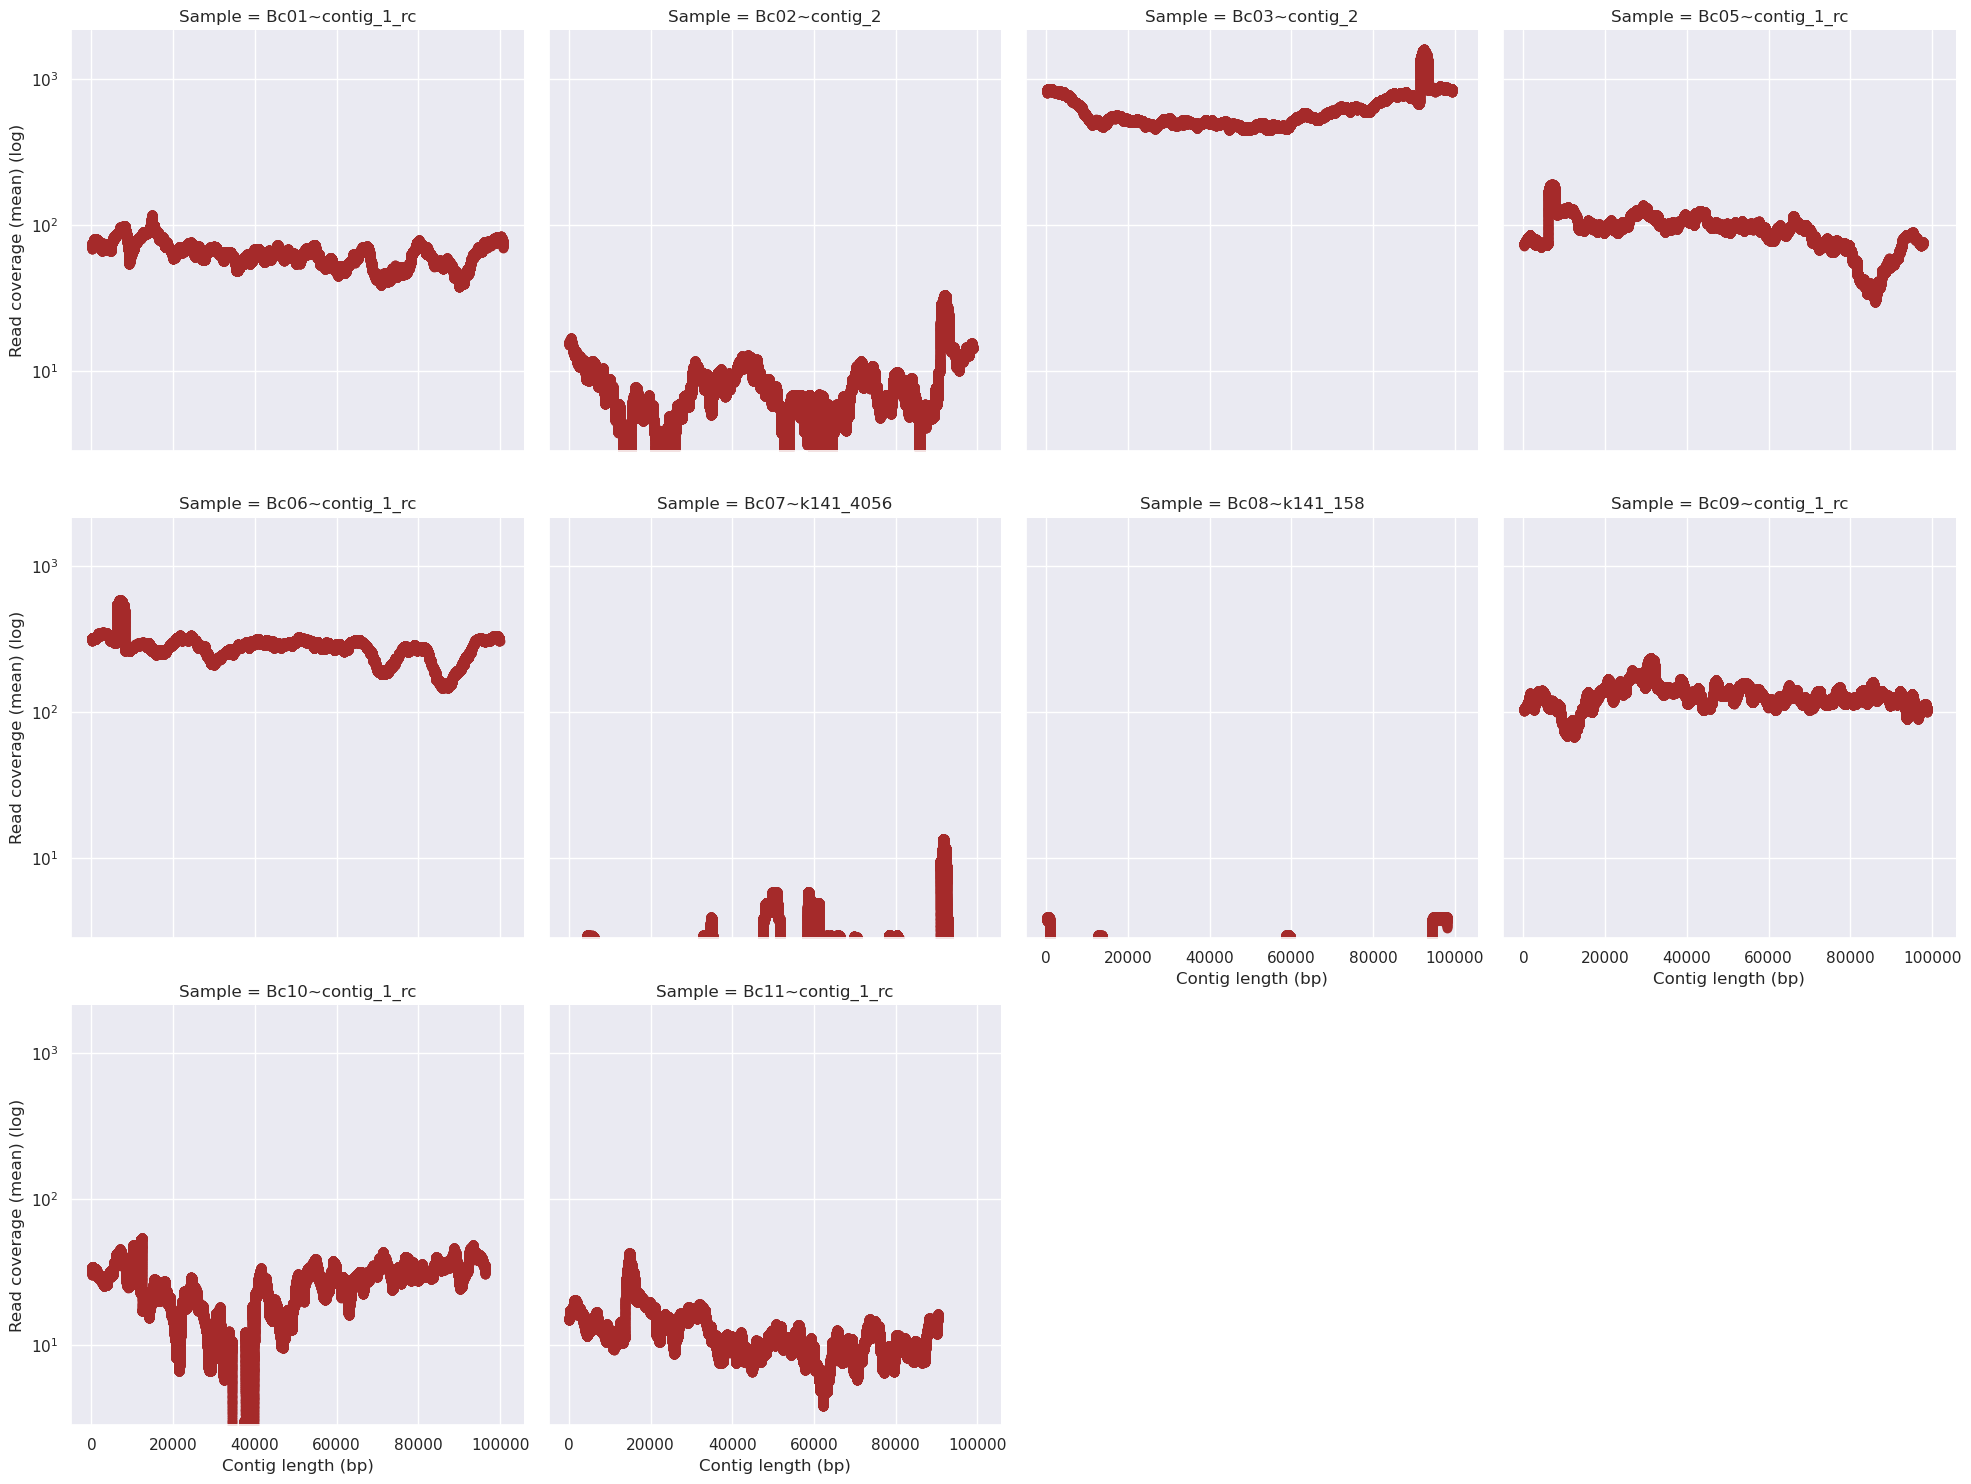

In [48]:
#plotting reads mapped across the genome position 
#sns.histplot(result, x="Coverage", kde=True, bins=10)
sns.set_theme(font_scale=1)
ax= sns.relplot("Genome position", "mean", data=new, col="Sample", col_wrap=4, 
                s=50, alpha=1, linewidth=0.0, color="brown")

ax.set_axis_labels("Contig length (bp)")
ax.set_ylabels("Read coverage (mean) (log)")
ax.set(yscale="log")


In [49]:
filepath="/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage"
sample_names=["Bc01", "Bc02", "Bc03", "Bc04", "Bc05", "Bc06", "Bc07", "Bc08", "Bc09", "Bc10", "Bc11", "Bc12", "Bc13", "Bc14", "Bc15", "Bc16"]
new=pd.DataFrame()
for f in sample_names:
    filename=filepath+"/"+f+"-NanoReads-bam/"+f+"-Nano-bedtools-genomecov.tsv"
    print (filename)
    if (os.path.exists(filename)==True):
        readcovIl=pd.read_csv(filename, sep="\t")
        #print(readcovIl)
        readcovIl.columns.values[0] = "Sample"
        readcovIl.columns.values[1] = "Genome position"
        readcovIl.columns.values[2] = "Depth"
        readcovIl["seq"]="Nanopore"
        readcovIl["mean"]= readcovIl["Depth"].rolling(100, center=False).mean()
        #print (readcovIl)
        new = new.append(readcovIl)
    filename=filepath+"/"+f+"-illuminaReads-bam/"+f+"-Ill-bedtools-genomecov.tsv"
    print (filename)
    if (os.path.exists(filename)==True):
        readcovIl=pd.read_csv(filename, sep="\t")
        #print(readcovIl)
        readcovIl.columns.values[0] = "Sample"
        readcovIl.columns.values[1] = "Genome position"
        readcovIl.columns.values[2] = "Depth"
        readcovIl["seq"]="Illumina"
        readcovIl["mean"]= readcovIl["Depth"].rolling(100, center=False).mean()
        #print (readcovIl)
        new = new.append(readcovIl)
    
new

/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc01-NanoReads-bam/Bc01-Nano-bedtools-genomecov.tsv
/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc01-illuminaReads-bam/Bc01-Ill-bedtools-genomecov.tsv
/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc02-NanoReads-bam/Bc02-Nano-bedtools-genomecov.tsv
/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc02-illuminaReads-bam/Bc02-Ill-bedtools-genomecov.tsv
/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc03-NanoReads-bam/Bc03-Nano-bedtools-genomecov.tsv
/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc03-illuminaReads-bam/Bc03-Ill-bedtools-genomecov.tsv


/local/nala0006/1106987/ipykernel_3918118/4097703686.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new = new.append(readcovIl)
/local/nala0006/1106987/ipykernel_3918118/4097703686.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new = new.append(readcovIl)
/local/nala0006/1106987/ipykernel_3918118/4097703686.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new = new.append(readcovIl)
/local/nala0006/1106987/ipykernel_3918118/4097703686.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new = new.append(readcovIl)
/local/nala0006/1106987/ipykernel_3918118/4097703686.py:16: FutureWarning: The frame.append method is deprec

/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc04-NanoReads-bam/Bc04-Nano-bedtools-genomecov.tsv
/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc04-illuminaReads-bam/Bc04-Ill-bedtools-genomecov.tsv
/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc05-NanoReads-bam/Bc05-Nano-bedtools-genomecov.tsv
/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc05-illuminaReads-bam/Bc05-Ill-bedtools-genomecov.tsv
/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc06-NanoReads-bam/Bc06-Nano-bedtools-genomecov.tsv
/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc06-illuminaReads-bam/Bc06-Ill-bedtools-genomecov.tsv
/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc07-NanoReads-bam/Bc07-Nano-bedtools-genomecov.tsv


/local/nala0006/1106987/ipykernel_3918118/4097703686.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new = new.append(readcovIl)
/local/nala0006/1106987/ipykernel_3918118/4097703686.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new = new.append(readcovIl)
/local/nala0006/1106987/ipykernel_3918118/4097703686.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new = new.append(readcovIl)
/local/nala0006/1106987/ipykernel_3918118/4097703686.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new = new.append(readcovIl)
/local/nala0006/1106987/ipykernel_3918118/4097703686.py:16: FutureWarning: The frame.append method is deprec

/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc07-illuminaReads-bam/Bc07-Ill-bedtools-genomecov.tsv
/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc08-NanoReads-bam/Bc08-Nano-bedtools-genomecov.tsv
/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc08-illuminaReads-bam/Bc08-Ill-bedtools-genomecov.tsv
/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc09-NanoReads-bam/Bc09-Nano-bedtools-genomecov.tsv


/local/nala0006/1106987/ipykernel_3918118/4097703686.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new = new.append(readcovIl)
/local/nala0006/1106987/ipykernel_3918118/4097703686.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new = new.append(readcovIl)
/local/nala0006/1106987/ipykernel_3918118/4097703686.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new = new.append(readcovIl)
/local/nala0006/1106987/ipykernel_3918118/4097703686.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new = new.append(readcovIl)


/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc09-illuminaReads-bam/Bc09-Ill-bedtools-genomecov.tsv
/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc10-NanoReads-bam/Bc10-Nano-bedtools-genomecov.tsv
/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc10-illuminaReads-bam/Bc10-Ill-bedtools-genomecov.tsv
/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc11-NanoReads-bam/Bc11-Nano-bedtools-genomecov.tsv
/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc11-illuminaReads-bam/Bc11-Ill-bedtools-genomecov.tsv
/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc12-NanoReads-bam/Bc12-Nano-bedtools-genomecov.tsv
/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc12-illuminaReads-bam/Bc12-Ill-bedtools-genomecov.tsv
/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc13-NanoReads-bam/Bc13-Nano-bedtools-genomecov.tsv
/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc13-illuminaR

/local/nala0006/1106987/ipykernel_3918118/4097703686.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new = new.append(readcovIl)
/local/nala0006/1106987/ipykernel_3918118/4097703686.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new = new.append(readcovIl)
/local/nala0006/1106987/ipykernel_3918118/4097703686.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new = new.append(readcovIl)
/local/nala0006/1106987/ipykernel_3918118/4097703686.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new = new.append(readcovIl)


/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc15-NanoReads-bam/Bc15-Nano-bedtools-genomecov.tsv
/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc15-illuminaReads-bam/Bc15-Ill-bedtools-genomecov.tsv
/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc16-NanoReads-bam/Bc16-Nano-bedtools-genomecov.tsv
/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/Bc16-illuminaReads-bam/Bc16-Ill-bedtools-genomecov.tsv


/local/nala0006/1106987/ipykernel_3918118/4097703686.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new = new.append(readcovIl)
/local/nala0006/1106987/ipykernel_3918118/4097703686.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new = new.append(readcovIl)


,Sample,Genome position,Depth,seq,mean
0,Bc01~contig_1_rc,2,47,Nanopore,NaN
1,Bc01~contig_1_rc,3,48,Nanopore,NaN
2,Bc01~contig_1_rc,4,50,Nanopore,NaN
3,Bc01~contig_1_rc,5,54,Nanopore,NaN
4,Bc01~contig_1_rc,6,55,Nanopore,NaN
...,...,...,...,...,...
98797,Bc16~k141_4400_rc,98799,651,Illumina,881.14
98798,Bc16~k141_4400_rc,98800,626,Illumina,877.78
98799,Bc16~k141_4400_rc,98801,616,Illumina,874.31
98800,Bc16~k141_4400_rc,98802,607,Illumina,870.99


/home/nala0006/miniconda3/envs/notebook_env/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


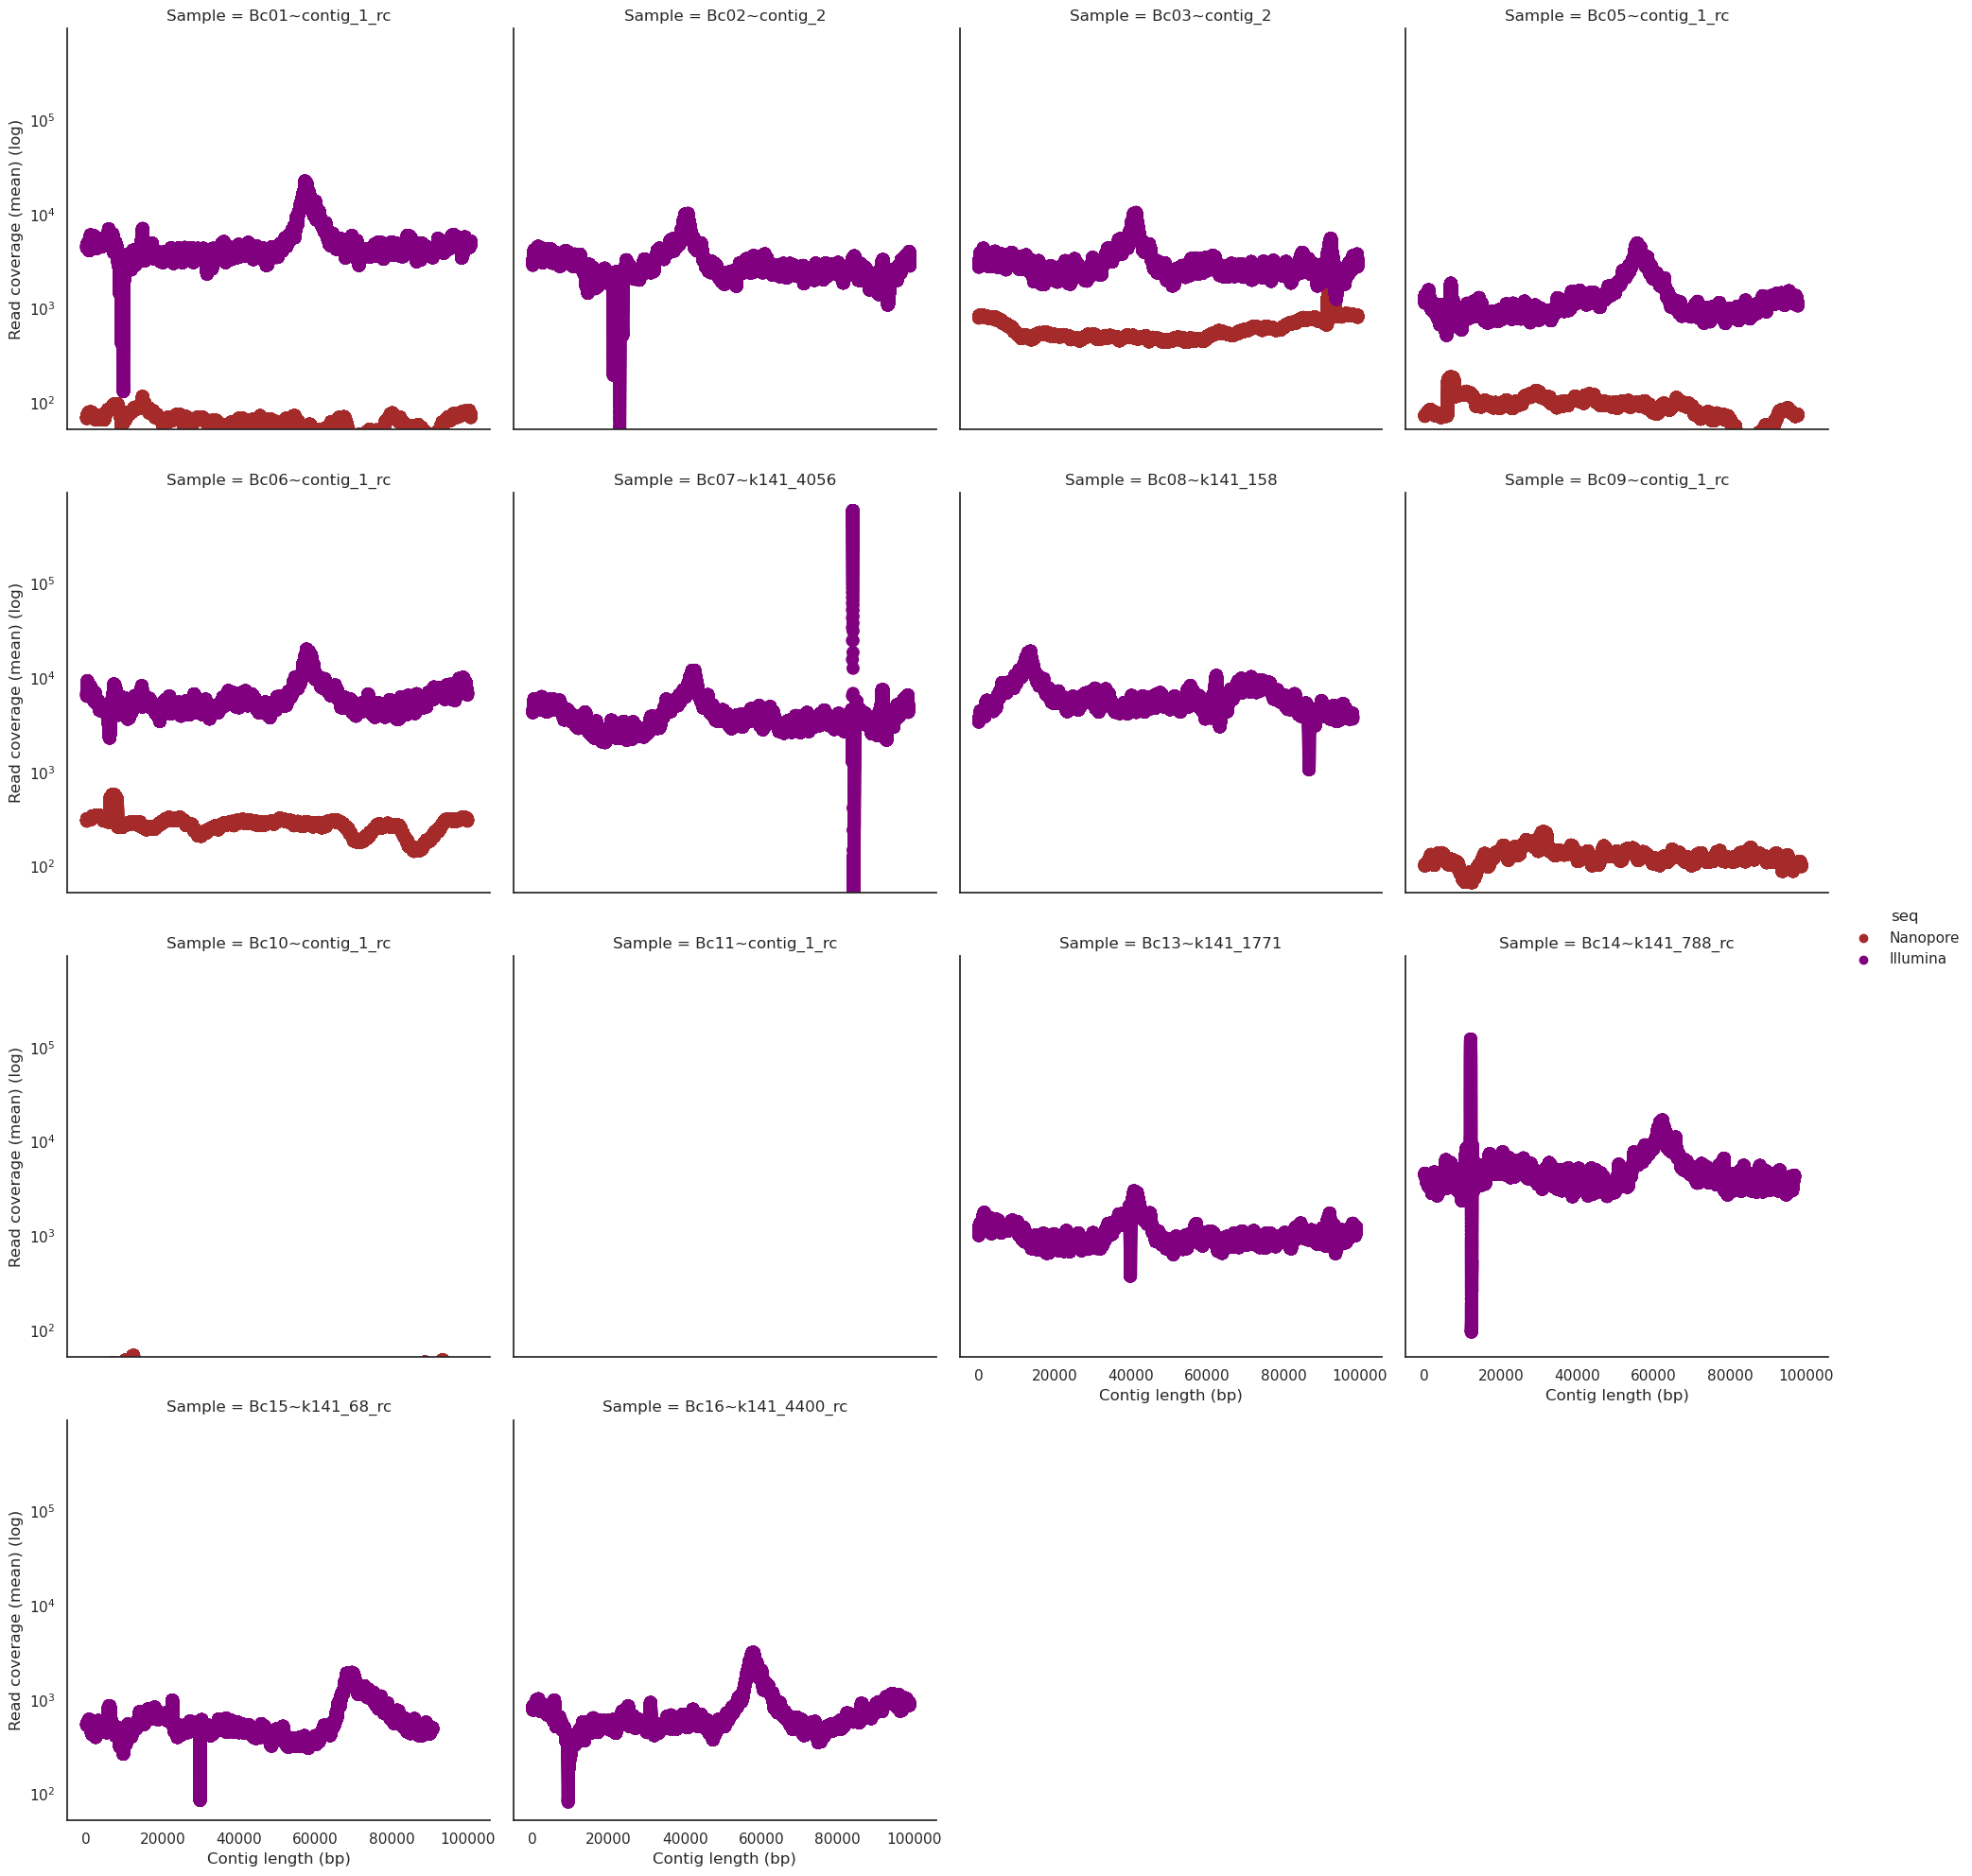

In [53]:
#plotting reads mapped across the genome position 
#sns.histplot(result, x="Coverage", kde=True, bins=10)
sns.set_theme(font_scale=1)
sns.set_style("white")

ax= sns.relplot("Genome position", "mean", data=new, col="Sample", col_wrap=4, 
                s=100, alpha=1, linewidth=0, hue="seq",
               palette=dict(Illumina="purple", Nanopore="brown"))

ax.set_axis_labels("Contig length (bp)")
ax.set_ylabels("Read coverage (mean) (log)")
ax.set(yscale="log")
###############################
#Saving file to a plot 
###############################
plt.savefig('/home/nala0006/scratch/Bc-PhageSeq/github/crassphage/coverage/phage-contigs-readcov.png')